In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *

Data Set 1
- How do you choose between SVM or NN?


In [3]:
df = pd.read_csv("slip_data.csv")
X = df[["f2","f2ang"]].to_numpy()
y = df["slips"].to_numpy()
y  = to_categorical(y)

In [4]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

model = Sequential()

model.add(Dense(units=4, activation='tanh', input_dim=2))
model.add(Dense(units=2,activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=['accuracy'])

# Train NN
#history = model.fit(X, y, epochs=1200, batch_size = 32, verbose=1)

In [5]:
def gen_sample_grid(npx=200, npy=200, limit1=1, limit2=1):
  x1line = np.linspace(0, limit1, npx)
  x2line = np.linspace(0, limit2, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

In [6]:
n=100
Xgrid, f2_line, f2ang_line = gen_sample_grid(n,n,40,360)

prob = model.predict(Xgrid)
prob_plot = prob[:,1].reshape(n,n) # Probaiblity that it slips

313/313 [==============================] - 1s 2ms/step


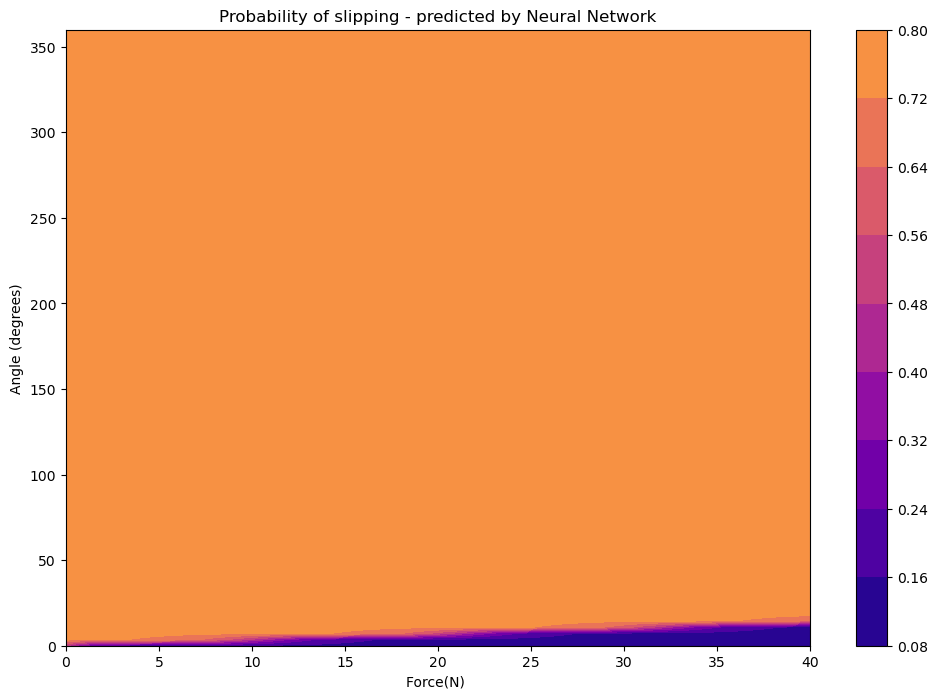

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8, forward=True)
contour = ax.contourf(f2_line,f2ang_line,prob_plot,vmax=1.0,cmap="plasma")
fig.colorbar(contour)

ax.set_ylabel("Angle (degrees)")
ax.set_xlabel("Force(N) ")

plt.title('Probability of slipping - predicted by Neural Network')
plt.show()


#ax.scatter(X[y == 0, 0], X[y == 0, 1],s=3)
#ax.scatter(X[y == 1, 0], X[y == 1, 1],s=3)
#ax.scatter(X[y == 2, 0], X[y == 2, 1],s=3)

### Repeat above with svm

In [8]:
y = df['slips']
X = df[["f2","f2ang"]].to_numpy()
X = scaler.fit_transform(X)

In [9]:
from sklearn.svm import SVC

#Get your SVM set up using the SVC library. 
svm = SVC(C=1000, gamma='scale', kernel='rbf')
svm.fit(X,y)

SVC(C=1000)

In [10]:
Xgrid, f2_line, f2ang_line = gen_sample_grid(n,n,40,360)
Xgrid = scaler.transform(Xgrid)

prob = svm.predict(Xgrid)
prob_plot = prob.reshape(n,n) # Probaiblity that it slips


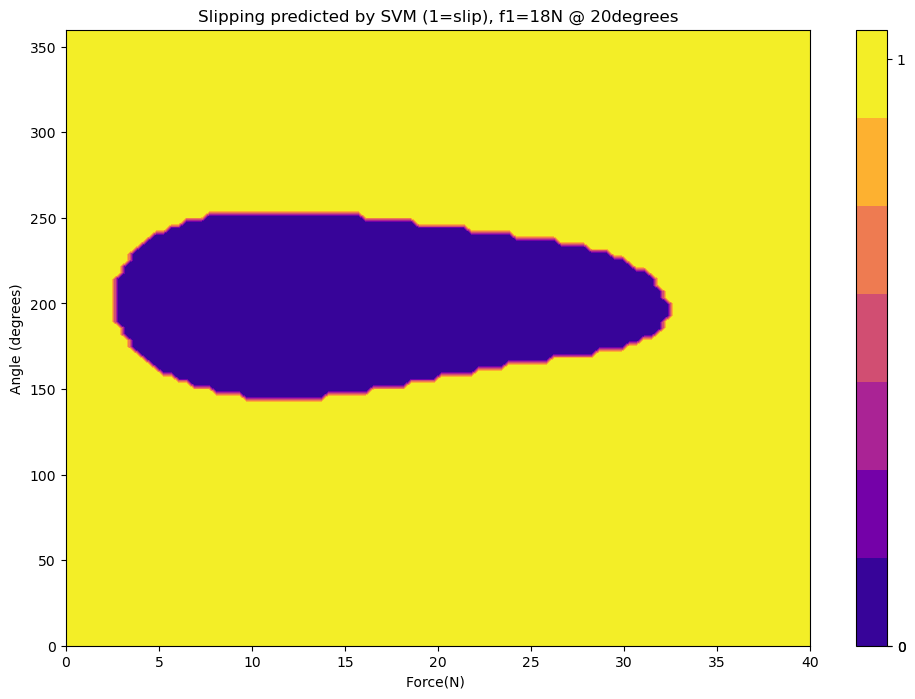

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8, forward=True)
contour = ax.contourf(f2_line,f2ang_line,prob_plot,vmax=1.0,cmap="plasma")
fig.colorbar(contour,ticks=[0,0,1.0])

ax.set_ylabel("Angle (degrees)")
ax.set_xlabel("Force(N) ")

plt.title('Slipping predicted by SVM (1=slip), f1=18N @ 20degrees')
plt.show()


#ax.scatter(X[y == 0, 0], X[y == 0, 1],s=3)
#ax.scatter(X[y == 1, 0], X[y == 1, 1],s=3)
#ax.scatter(X[y == 2, 0], X[y == 2, 1],s=3)

1- NN's need much more data than SVM's to adequately train and not overfit, and we only have 1000 here.

2- Con is that ML doesn't consider physical insights so can't incorporate rules. Pro is that when we have many parameters ( say 10 forces and angles) problem isn't analytically tractable 

3- We can work out with our mechanics knowledge when this will slip with a simple equation, since problem is relatively simple and constrainged

Analytical Solution
- Case 1: Check each perpendicular individually

In [12]:
Xgrid, f2_line, f2ang_line = gen_sample_grid(n,n,40,360)

r = 3 * 9.81* 0.5
#f1 = 18, f1ang = 20
rad = lambda x:  x*np.pi/180

f1x = 18 * np.cos(rad(20))
f1y = 18 * np.sin(rad(20))


slips_1 = np.zeros(10000)
slips_2 = np.zeros(10000)
# constants

for i in range(10000):
    f2x = Xgrid[i,0] * np.cos(rad(Xgrid[i,1]))
    f2y = Xgrid[i,0] * np.sin(rad(Xgrid[i,1]))
    
    if (f2x + f1x > r) or (f2y + f1y > r): # Assumption 1
        slips_1[i] = 1
    
    fx = (f1x + f2x)**2
    fy = (f1y + f2y)**2

    f = np.sqrt(fx + fy)

    if (f > r):
        slips_2[i] = 1

In [13]:
slips_1 = slips_1.reshape(100,100)
slips_2 = slips_2.reshape(100,100)

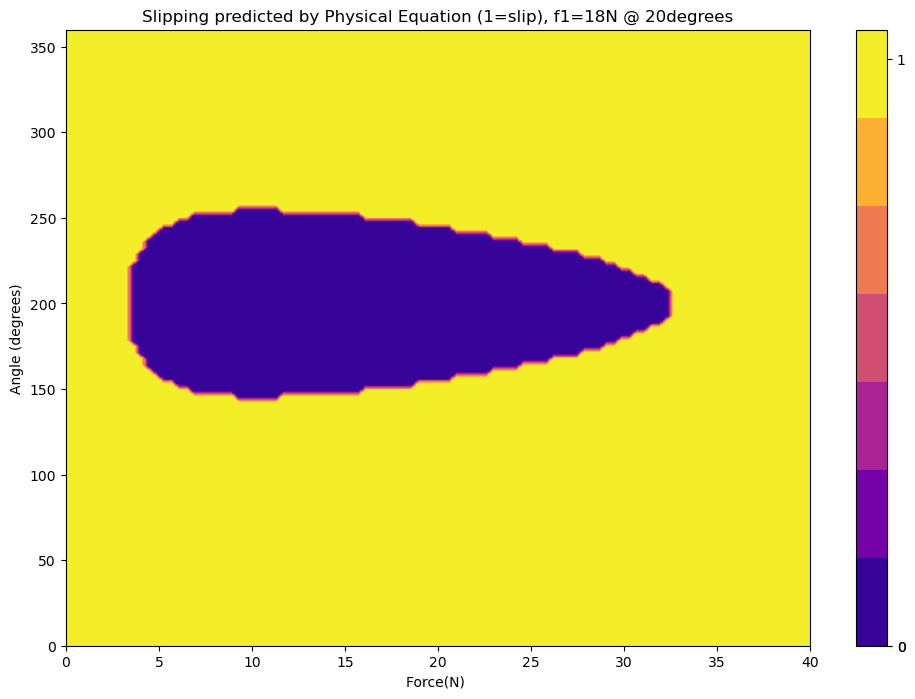

In [14]:
# Second assumption is correct
fig, ax = plt.subplots()
fig.set_size_inches(12, 8, forward=True)
contour = ax.contourf(f2_line,f2ang_line,slips_2,vmax=1.0,cmap="plasma")
fig.colorbar(contour,ticks=[0,0,1.0])

ax.set_ylabel("Angle (degrees)")
ax.set_xlabel("Force(N) ")

plt.title('Slipping predicted by Physical Equation (1=slip), f1=18N @ 20degrees')
plt.show()


#ax.scatter(X[y == 0, 0], X[y == 0, 1],s=3)
#ax.scatter(X[y == 1, 0], X[y == 1, 1],s=3)
#ax.scatter(X[y == 2, 0], X[y == 2, 1],s=3)

### Data Set 2

In [15]:
df = pd.read_csv("slip_data_full.csv")
y = df["slips"].to_numpy()

X = df.drop(labels=['slips','m'],axis=1).to_numpy()

scaler = StandardScaler()

X = scaler.fit_transform(X)

svm = SVC(C=1000, gamma='scale', kernel='rbf')
svm.fit(X,y)

SVC(C=1000)

In [16]:
Xgrid, f2_line, f2ang_line = gen_sample_grid(n,n,40,360)

f1_force = np.full((n*n,1),10)
f1_ang = np.full((n*n,1),30)

f1 = np.concatenate((f1_force,f1_ang),axis=1)

Xgrid = np.concatenate((f1, Xgrid),axis=1)

Xgrid = scaler.transform(Xgrid)


In [17]:
prob = svm.predict(Xgrid)
prob_plot = prob.reshape(n,n) # Probaiblity that it slips

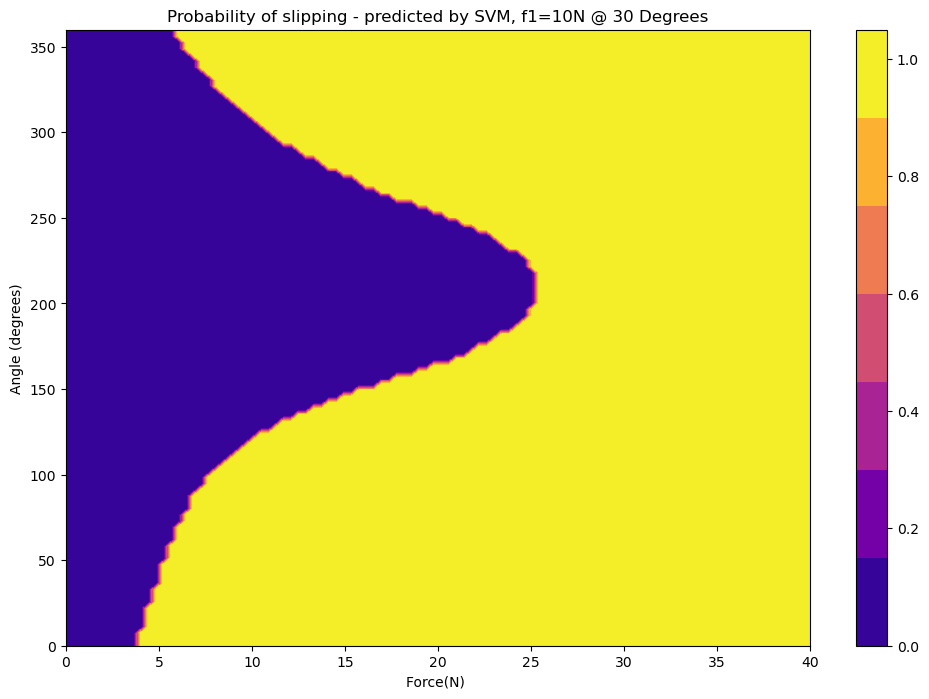

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8, forward=True)
contour = ax.contourf(f2_line,f2ang_line,prob_plot,vmax=1.0,cmap="plasma")
fig.colorbar(contour,ticks=[0,0.2,0.4,0.6,0.8,1.0])

ax.set_ylabel("Angle (degrees)")
ax.set_xlabel("Force(N) ")

plt.title('Probability of slipping - predicted by SVM, f1=10N @ 30 Degrees')
plt.show()


#ax.scatter(X[y == 0, 0], X[y == 0, 1],s=3)
#ax.scatter(X[y == 1, 0], X[y == 1, 1],s=3)
#ax.scatter(X[y == 2, 0], X[y == 2, 1],s=3)

E- F1 and F1_Angle are now varying as well, so the data is a meshgrid of f1,f2,f1ang,f2ang, hence much larger